In [61]:
## Basic
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import time
from scipy.interpolate import interp1d
#sys.path.append("../../package/")
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#fig_post_def()

# Function

In [62]:
cm =1/2.54
def fig_pre_def(fx=8, fy=6,lw=1,dpi = 200):
    cm =1/2.54
    plt.rcParams['figure.dpi'] = dpi
    plt.rc('font', family='Helvetica')         # 自型
    plt.rcParams['axes.linewidth'] = lw     # 設置外框的寬度
    return  plt.figure(figsize=(fx*cm,fy*cm))   
    ax = fig.add_subplot(1, 1, 1)
def fig_post_def(xticks =(None,None),yticks =(None,None), 
                 xlim=(None,None),ylim=(None,None),
                 xlabel = None,ylabel=None,
                 title=None,
                 lg_fs = 6,lb_fs = 8,
                 unit = 1/2.54, SVG = False,onefig=True):
    if xticks[0] != None:
        # Edit the major and minor tick locations 設定格線 不指定將由程式自行設定
        ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xticks[0]))    
        ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xticks[1]))    
    if yticks[0] != None:
        ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yticks[0]))
        ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(yticks[1]))
    #plt.rc('xtick', labelsize=fontsize)          # X軸數字的文字大小
    #plt.rc('ytick', labelsize=fontsize)          # Y軸數字的文字大小
    ax.tick_params(axis='x', labelsize= lb_fs)
    ax.tick_params(axis='y', labelsize= lb_fs)
    ax.xaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', top='on')    # x軸主要格線
    ax.xaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', top='on')     # x軸次要格線
    ax.yaxis.set_tick_params(which='major', size=10*unit, width=1, direction='in', right='on')   # y軸主要格線
    ax.yaxis.set_tick_params(which='minor', size=7*unit, width=1, direction='in', right='on')   # y軸次要格線
    
    if xlim != None:
        ax.set_xlim(xlim)
    if ylim != None:
        ax.set_ylim(ylim)
    if xlabel != None:
        ax.set_xlabel(xlabel,fontsize=lb_fs)
    if ylabel != None:
        ax.set_ylabel(ylabel,fontsize=lb_fs)

    if SVG == True:
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        new_rc_params = {'text.usetex': False,
        "svg.fonttype": 'none'
        }
        plt.rcParams['axes.linewidth'] = 1     # 設置外框的寬度
        mpl.rcParams.update(new_rc_params)
    if onefig ==True:
        plt.gca().set_position([0, 0, 1, 1])


    plt.legend(fontsize=lg_fs,title=title,title_fontsize=lg_fs,frameon= False)
    plt.rcParams['figure.dpi'] = 80
#cm =1/2.54
#fig = fig_pre_def(6,4.5,1)# 圖片大小
#ax = fig.add_subplot(1, 1, 1)          # 產生1x1格圖片、在第一格
#plt.scatter(x,y, alpha=0.6,linewidth=0,s=30*cm,label=' ')
#plt.plot(x,y     ,'--ob',markersize=8*cm,linewidth=3*cm,mew=0,label='point source')
#fig_post_def()
def sorting(input_data, bin_number , lower_range, upper_range):
    hist, edges = np.histogram( #hist 每格裡面統計的數量 edges:每一格的邊界
    input_data, #要分析的矩陣
    bins=bin_number, 
    range=(lower_range, upper_range), #範圍
    density=False) #是否Normalized成百分比
    Bin_center = []
    for i in range(len(edges)-1):
        Bin_center_single = round((edges[i]+edges[i+1])/2,2)
        Bin_center = np.append(Bin_center,Bin_center_single)
    
    return Bin_center, hist

# Read File

In [63]:
folder = "../../../../data/Gamma_trigger_TOF/GammaTri_ch0_3in_D150cm_Ch46_2in_3cm/"
raw_data_1  =np.loadtxt(folder+"20220108AmBe_TH3535_HV1550_D150cmd3cm_320ns_4hrs.txt")
raw_data_2  =np.loadtxt(folder+"20220108AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #16
raw_data_3  =np.loadtxt(folder+"20220109AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")
raw_data_4  =np.loadtxt(folder+"20220110AmBe_TH3535_HV1550_D150cmd3cm_320ns_20hrs.txt")
raw_data_5  =np.loadtxt(folder+"20220111AmBe_TH3535_HV1550_D150cmd3cm_320ns_24hrs_2.txt")   #72
raw_data_6  =np.loadtxt(folder+"20220112AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #84
raw_data_7  =np.loadtxt(folder+"20220113AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #96
raw_data_8  =np.loadtxt(folder+"20220113AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt") #108
raw_data_9  =np.loadtxt(folder+"20220114AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #120
raw_data_10 =np.loadtxt(folder+"20220115AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #132
raw_data_11 =np.loadtxt(folder+"20220115AmBe_TH3535_HV1550_D150cmd3cm_320ns_24hrs.txt")   #146
raw_data_12 =np.loadtxt(folder+"20220116AmBe_TH3535_HV1550_D150cmd3cm_320ns_24hrs.txt")   #170
raw_data_13 =np.loadtxt(folder+"20220117AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #182
raw_data_14 =np.loadtxt(folder+"20220118AmBe_TH3535_HV1550_D150cmd3cm_320ns_12hrs.txt")   #194
raw_data_15 =np.loadtxt(folder+"20220119AmBe_TH3535_HV1550_D150cmd3cm_320ns_6hrs.txt")    #200

raw_data = np.zeros(shape=6)
print(raw_data)
for i in range(1,16):
    #print(i)
    add = globals()["raw_data_"+str(i)]  # convert string to variable name
    print(add.shape)
    raw_data=np.vstack((raw_data,add))

#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_PSD","Tri_LO_ch"])
#raw_data = pd.DataFrame(raw_data,columns=["time_diff","Rec_PSD","Rec_LO_ch","Tri_Det","Tri_LO_ch"])
print("time differnet   PSD.        Energy       trigger_channel")
print(raw_data)
print(len(raw_data))
print(raw_data.shape)

[0. 0. 0. 0. 0. 0.]
(1907, 6)
(5534, 6)
(5517, 6)
(10094, 6)
(13008, 6)
(6381, 6)
(5485, 6)
(5485, 6)
(5351, 6)
(5490, 6)
(10586, 6)
(10670, 6)
(5483, 6)
(6382, 6)
(3026, 6)
time differnet   PSD.        Energy       trigger_channel
[[0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [7.50100e+00 1.96970e-01 1.32000e+02 6.00000e+00 2.31183e-01 1.86000e+02]
 [2.81200e+00 2.53497e-01 5.72000e+02 6.00000e+00 2.58790e-01 7.11000e+02]
 ...
 [5.98160e+01 2.65504e-01 1.54800e+03 6.00000e+00 3.68092e-01 9.59000e+02]
 [5.34000e+00 2.63452e-01 6.96900e+03 4.00000e+00 3.76726e-01 1.01400e+03]
 [1.75624e+02 3.97554e-01 6.54000e+02 6.00000e+00 1.96347e-01 2.19000e+02]]
100400
(100400, 6)


# Processing  

## Light output convertion

In [64]:
Rec_Ch_To_LO = 0.000619
Tri_Ch_To_LO = 0.000580
raw_data_LO = raw_data.copy()
raw_data_LO[:,2] = raw_data[:,2]*Rec_Ch_To_LO
raw_data_LO[:,5] = raw_data[:,5]*Tri_Ch_To_LO
raw_data = pd.DataFrame(raw_data_LO,columns=["time_diff","Rec_PSD","Rec_LO","Tri_Det","Tri_PSD","Tri_LO"])
print(raw_data.head())
#neutron_signal[:,0] = neutron_signal[:,0]

   time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO
0      0.000  0.000000  0.000000      0.0  0.000000  0.00000
1      7.501  0.196970  0.081708      6.0  0.231183  0.10788
2      2.812  0.253497  0.354068      6.0  0.258790  0.41238
3   -231.437  0.262391  0.212317      6.0  0.341434  1.45580
4     13.438  0.254167  0.297120      4.0  0.237841  1.08518


## PSD selection

In [65]:
#Signal processing
print(raw_data.shape)
#mask_Tri_Ch4        = raw_data['Tri_Det']==4
mask_Rec_LO         = raw_data['Rec_LO']<10000*Rec_Ch_To_LO
mask_Rec_PSD_upper  = raw_data['Rec_PSD'] < 0.5
mask_Rec_PSD_lower  = raw_data['Rec_PSD'] > 0.3
mask_Tri_n_PSD_upper  = raw_data['Tri_PSD'] < 0.5
mask_Tri_n_PSD_lower  = raw_data['Tri_PSD'] > 0.3
mask_Tri_g_PSD_upper  = raw_data['Tri_PSD'] < 0.3
mask_Tri_g_PSD_lower  = raw_data['Tri_PSD'] > 0

#filter neutron in recording detector
pro_data = raw_data[(#mask_Tri_Ch4 &
                     mask_Rec_LO
                    & mask_Rec_PSD_upper
                    & mask_Rec_PSD_lower 
                    & mask_Tri_g_PSD_upper
                    & mask_Tri_g_PSD_lower
                    )] 

print(pro_data.shape)
print(pro_data.head())
#not filter neutron in recording detector
# just for time delay correction
pro_data_all = raw_data[(#mask_Tri_Ch4 
                        #&
                        mask_Tri_g_PSD_upper
                        & mask_Tri_g_PSD_lower
                        & mask_Rec_LO)]

pro_data_g_n = raw_data[(#mask_Tri_Ch4 & 
                        mask_Rec_LO)]


(100400, 6)
(18409, 6)
    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338
32    204.344  0.350195  0.159083      4.0  0.234447  1.00688
47     54.470  0.360825  1.320946      4.0  0.249425  4.28562
59    238.346  0.391101  0.792939      6.0  0.251366  0.42456
61    160.751  0.391156  0.181986      6.0  0.263590  0.91756


## System delay correction

In [66]:
mask_Rec_g_PSD_upper = raw_data['Rec_PSD'] < 0.3
mask_Rec_g_PSD_lower = raw_data['Rec_PSD'] > 0
#rec_g_data = raw_data[(mask_Tri_Ch4 & mask_Rec_LO&mask_Tri_g_PSD_upper&mask_Tri_g_PSD_lower&mask_Rec_g_PSD_upper&mask_Rec_g_PSD_lower)]
bin_center, hist  = sorting(pro_data_all['time_diff'],1600,-400,400)
bin_center, hist_neutron = sorting(pro_data['time_diff'],1600,-400,400)
#bin_center, hist_gamma = sorting(rec_g_data['time_diff'],1600,-400,400)

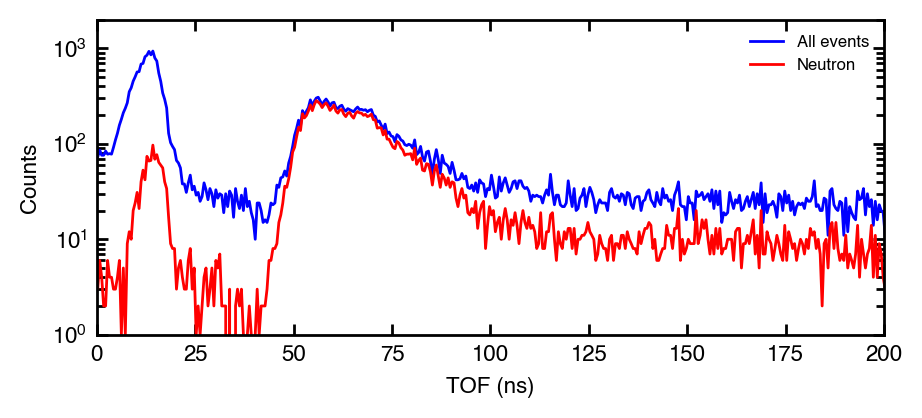

In [67]:
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist,'b',linewidth=1,label ='All events')
plt.plot(bin_center,hist_neutron,'r' ,linewidth=1,label ='Neutron')
#plt.plot(bin_center,hist_gamma,'g' ,linewidth=1,label ='gamma')
fig_post_def(xlim =(0,200),ylim = (1,2000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

In [49]:
max_position = np.argmax(hist)
measured_gamma_time_diff= bin_center[max_position]
print('measured gamma different time: ',measured_gamma_time_diff,' ns')

measured gamma different time:  14.25  ns


In [50]:
light_speed = 299792468 #m/s
nano_second = 10**(-9)  #s
experimental_gamma_different= ((1.5-0.03)/light_speed)/nano_second
print(experimental_gamma_different)

4.903392035853281


In [51]:
system_delay = measured_gamma_time_diff - experimental_gamma_different
print('system_delay  ',system_delay, '  ns')

system_delay   9.346607964146719   ns


In [52]:
#system_delay =8.6

In [53]:
proT_data = pro_data.copy(deep=True)
proT_data["TOF"] = proT_data["time_diff"].apply(lambda x:x-system_delay)
print(proT_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338  279.809392
32    204.344  0.350195  0.159083      4.0  0.234447  1.00688  194.997392
47     54.470  0.360825  1.320946      4.0  0.249425  4.28562   45.123392
59    238.346  0.391101  0.792939      6.0  0.251366  0.42456  228.999392
61    160.751  0.391156  0.181986      6.0  0.263590  0.91756  151.404392


In [54]:
proT_data_all = pro_data_all.copy(deep=True)
proT_data_all["TOF"] = proT_data_all["time_diff"].apply(lambda x:x-system_delay)
print(proT_data_all.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF
1       7.501  0.196970  0.081708      6.0  0.231183  0.10788   -1.845608
2       2.812  0.253497  0.354068      6.0  0.258790  0.41238   -6.534608
4      13.438  0.254167  0.297120      4.0  0.237841  1.08518    4.091392
5    -246.969  0.232283  0.314452      6.0  0.269111  4.28678 -256.315608
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338  279.809392


# Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


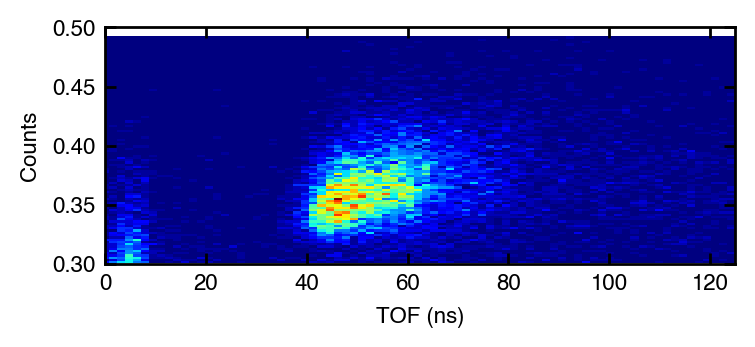

In [55]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data['TOF'],proT_data['Rec_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,125),ylim = (0.3,0.5),xlabel = 'TOF (ns)',ylabel = 'Counts')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


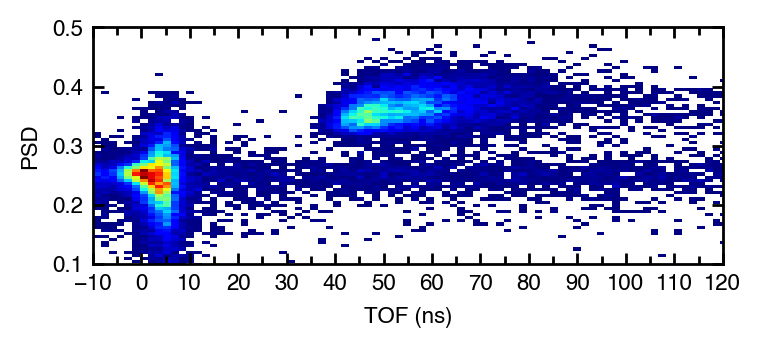

In [58]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['TOF'],proT_data_all['Rec_PSD'], bins=(400, 100),cmin=2, cmap=plt.cm.jet)


fig_post_def(xlim =(-10,120),ylim = (0.1,0.5),xticks=(10,5),xlabel = 'TOF (ns)',ylabel = 'PSD')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


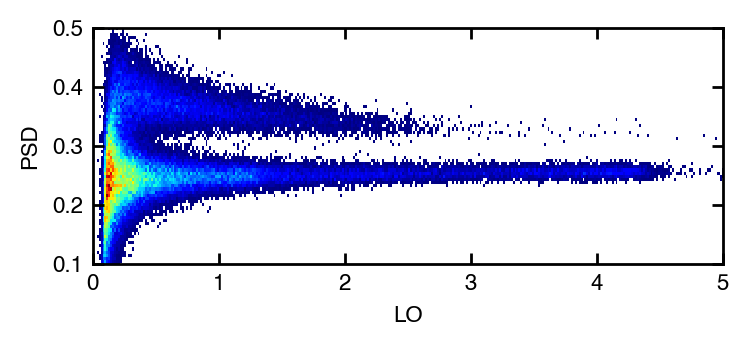

In [43]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['Rec_LO'],proT_data_all['Rec_PSD'], bins=(400, 100),cmin=1, cmap=plt.cm.jet)

fig_post_def(xlim =(0,5),ylim = (0.1,0.5),xlabel = 'LO',ylabel = 'PSD')


In [44]:
bin_center, hist_T  = sorting(proT_data_all['TOF'],1600,-400,400)
bin_center, hist_neutron_T = sorting(proT_data['TOF'],1600,-400,400)

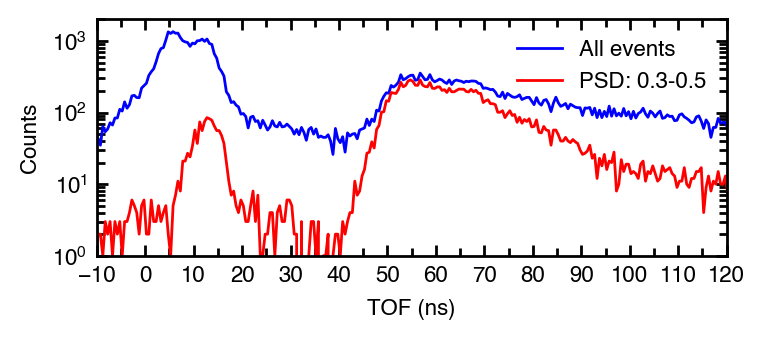

In [45]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_T,'b',linewidth=1,label ='All events')
plt.plot(bin_center,hist_neutron_T,'r' ,linewidth=1,label ='PSD: 0.3-0.5')

fig_post_def(xlim =(-10,120),ylim = (1,2000),xticks=(10,5),xlabel = 'TOF (ns)',ylabel = 'Counts',lg_fs=8)
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

# Time to energy

In [173]:
# Time to energy
def Time_to_energy(TOF):
    distance = 1.5+0.0254*1.5 # m
    light_speed = 299792458 # m/s
    neutron_mass = 1.64749*10**-27 #kg
    if type(TOF).__module__ == np.__name__:
        #print(type(TOF))
        if TOF.any()==0:
            return 0
        else:
            beta= distance/(light_speed*TOF*10**-9)
            neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
            return neutron_energy
    else:
        beta= distance/(light_speed*TOF*10**-9)
        neutron_energy = neutron_mass* light_speed**2*((1-beta**2)**-0.5-1)*(1.6*10**-19)**-1*(10**-6)
        return neutron_energy


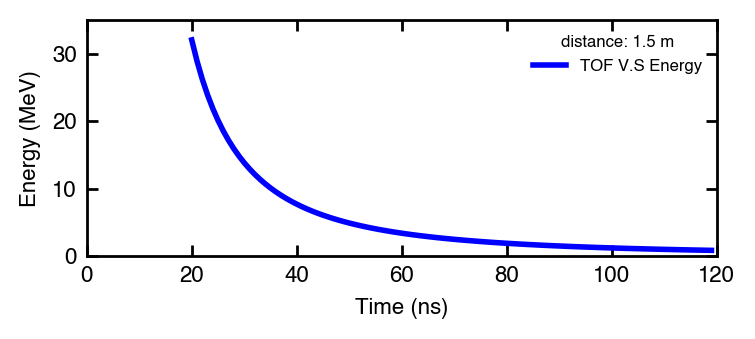

In [174]:
time_along= np.arange(20,120,1)
E_along = Time_to_energy(time_along)

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) #畫一張圖的時候用 111

#for i in time_along:
#    E_along = np.append(E_along,Time_to_energy(timealong))
ax.plot(time_along,E_along,'b',linewidth =2,label = 'TOF V.S Energy')

fig_post_def(xlim=(0,120),ylim=(0,35), xlabel ='Time (ns)',ylabel = 'Energy (MeV)',title="distance: 1.5 m")


In [175]:
resolution_time =0.1 #ns

proE_data = proT_data.copy()
proE_data['Rec_E'] = Time_to_energy(np.round(proE_data['TOF']/resolution_time)*resolution_time  )

print(proE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338  279.809392   
32    204.344  0.350195  0.159083      4.0  0.234447  1.00688  194.997392   
47     54.470  0.360825  1.320946      4.0  0.249425  4.28562   45.123392   
59    238.346  0.391101  0.792939      6.0  0.251366  0.42456  228.999392   
61    160.751  0.391156  0.181986      6.0  0.263590  0.91756  151.404392   

       Rec_E  
11  0.155617  
32  0.320478  
47  6.046851  
59  0.232346  
61  0.531820  


In [176]:
rec_eff = np.loadtxt('20220211_efficiency.txt')
print(rec_eff.shape)

(148, 2)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


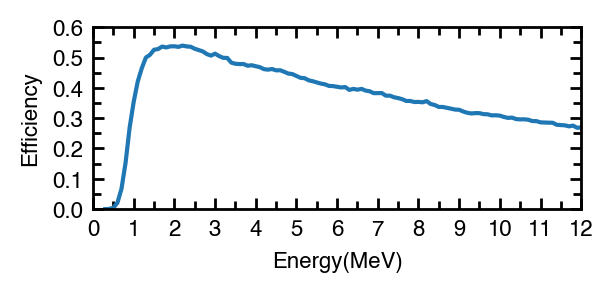

In [177]:
fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 1, 1) 
ax.plot(rec_eff[:,0],rec_eff[:,1])#,label ='efficiency')
fig_post_def(xlim=(0,12),ylim=(0,0.6),xticks=(1,0.5),yticks=(0.1,0.05),xlabel ='Energy(MeV)',ylabel = 'Efficiency',onefig=False)



<Figure size 629.921x472.441 with 0 Axes>

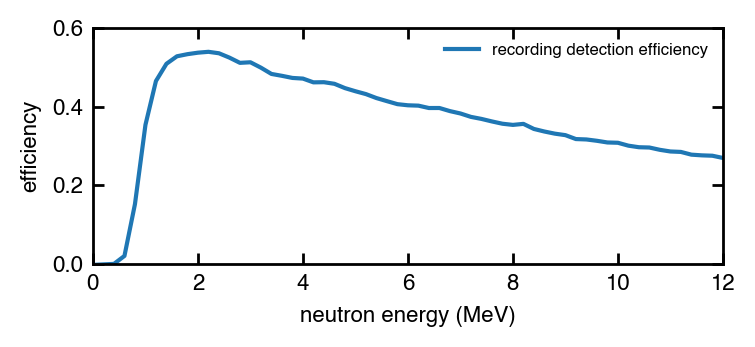

In [178]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,20,0.2) # unit 0.0001 # times 10000

interpolation_func  = interp1d(rec_eff[:,0],rec_eff[:,1],fill_value="extrapolate") 
rec_eff_inter = interpolation_func(interpoplation_axis)

#interpolation_func  = interp1d(scatter_eff[:,0],scatter_eff[:,1]/10000,fill_value="extrapolate") 
#scatter_eff_inter = interpolation_func(interpoplation_axis)
plt.plot(interpoplation_axis,rec_eff_inter,'-',label = 'recording detection efficiency')


fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

In [179]:
mask_TOF_upper  = proEE_data['TOF'] < 110
mask_TOF_lower  = proEE_data['TOF'] > 30

proET_data = proE_data[(mask_TOF_upper 
                        & mask_TOF_lower )]

print(proET_data.head())

     time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO        TOF  \
47      54.470  0.360825  1.320946      4.0  0.249425  4.28562  45.123392   
71      53.375  0.367360  0.982353      4.0  0.238907  2.14368  44.028392   
72      78.094  0.368902  0.203032      6.0  0.281533  0.83230  68.747392   
101     62.298  0.358224  1.268331      4.0  0.240391  2.79154  52.951392   
103     55.828  0.354902  0.315690      6.0  0.254779  3.24626  46.481392   

        Rec_E  
47   6.046851  
71   6.356134  
72   2.591491  
101  4.366723  
103  5.684910  


In [180]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 20 # 10 MeV
Binning = 100 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proET_data['Rec_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

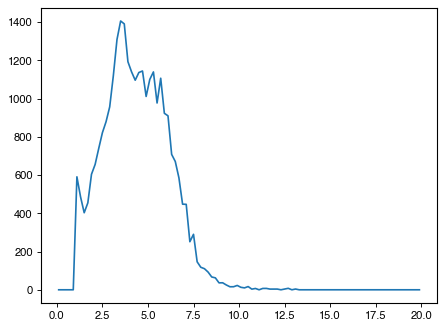

In [181]:
plt.plot(Neutron_E_axis, Neutron_E_y/rec_eff_inter)

In [182]:
ISO_spectrum = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')

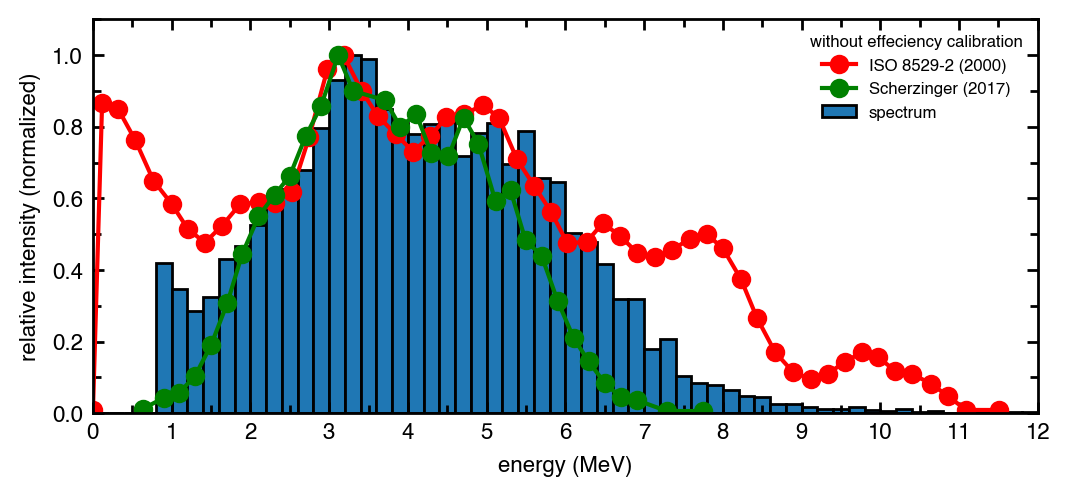

In [184]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

spectrum= Neutron_E_y/rec_eff_inter
ax.bar(Neutron_E_axis-0.2,spectrum/spectrum.max() ,width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




# Trigger LO to proton energy 
apply for all but only suitable for Trigger PSD:0.3-0.5

In [56]:
def Light_output_exponential_method(E):
    A=0.62  #0.817
    B=1.3   #2.63
    C=0.39  #0.297
    D=0.97  #1
    LO =A*E-B*(1-np.exp(-1*C*E**D))
    return LO
def interpolation_function(data_x,data_y,new_x):
    new_y = interp1d(data_x, data_y,fill_value="extrapolate")(new_x)
    return new_y

In [61]:
enegy_range= np.arange(0,10,0.0001)
lightoutput_2inches= Light_output_exponential_method(enegy_range)
print(lightoutput_2inches)

[ 0.00000000e+00 -4.83389860e-06 -6.91372695e-06 ...  4.93395618e+00
  4.93401698e+00  4.93407777e+00]


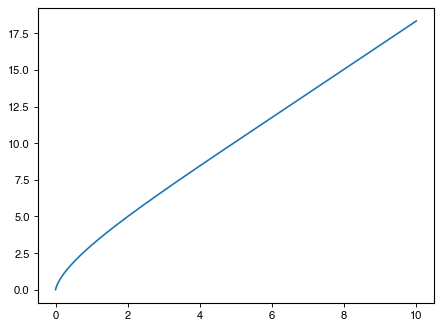

In [62]:
LO_range= np.arange(0,10,0.00001)
P_Energy_inter = interpolation_function(lightoutput_2inches,enegy_range,LO_range)
plt.plot(LO_range,P_Energy_inter)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


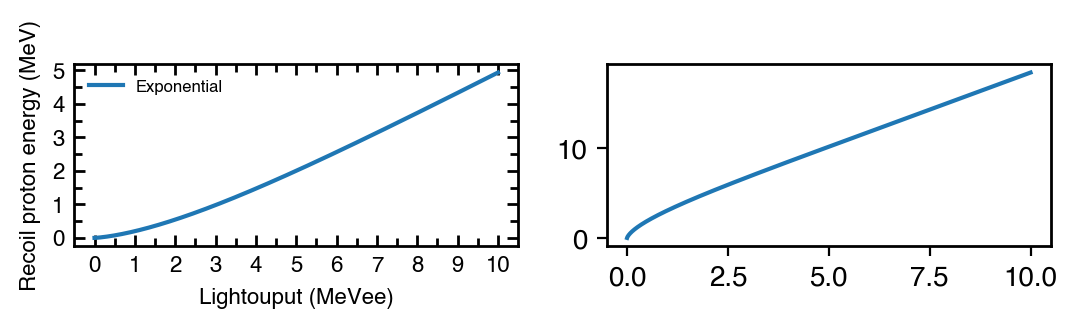

In [63]:
fig = fig_pre_def(16,3) # 定義圖片大小 default 8*6

ax =fig.add_subplot(1, 2, 1) 
ax.plot(enegy_range,lightoutput_2inches,label ='Exponential')
#ax.plot(P_Energy_inter,LO_range)
fig_post_def(xticks=(1,0.5),yticks=(1,0.5),xlabel ='Lightouput (MeVee)',ylabel = 'Recoil proton energy (MeV)',onefig=False)


ax2 =fig.add_subplot(1, 2, 2) 
ax2.plot(LO_range,P_Energy_inter)
fig_post_def(xticks=(1,0.5),yticks=(1,0.5),xlabel ='Lightouput (MeVee)',ylabel = 'Recoil proton energy (MeV)',onefig=False)




In [64]:
print(proE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338  279.918467   
32    204.344  0.350195  0.159083      4.0  0.234447  1.00688  195.106467   
47     54.470  0.360825  1.320946      4.0  0.249425  4.28562   45.232467   
59    238.346  0.391101  0.792939      6.0  0.251366  0.42456  229.108467   
61    160.751  0.391156  0.181986      6.0  0.263590  0.91756  151.513467   

       Rec_E  
11  0.155505  
32  0.320149  
47  6.019864  
59  0.232143  
61  0.531117  


In [65]:
proEE_data = proE_data.copy()
proEE_data["Recoil_p_E"] = proEE_data["Tri_LO"].apply(lambda x:P_Energy_inter[int(x*100000)])
proEE_data["Total_E"] = proEE_data["Rec_E"]+proEE_data["Recoil_p_E"]

print(proEE_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
11    289.156  0.300813  0.152274      6.0  0.268205  2.41338  279.918467   
32    204.344  0.350195  0.159083      4.0  0.234447  1.00688  195.106467   
47     54.470  0.360825  1.320946      4.0  0.249425  4.28562   45.232467   
59    238.346  0.391101  0.792939      6.0  0.251366  0.42456  229.108467   
61    160.751  0.391156  0.181986      6.0  0.263590  0.91756  151.513467   

       Rec_E  Recoil_p_E    Total_E  
11  0.155505    5.738588   5.894093  
32  0.320149    3.059372   3.379521  
47  6.019864    8.928638  14.948502  
59  0.232143    1.682607   1.914749  
61  0.531117    2.867050   3.398167  


In [66]:
rec_eff = np.loadtxt('20220211_efficiency.txt')
scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency.txt")
#scatter_eff=np.loadtxt("../Neutron_scatter_exp_simulation/TOF_effciency_threshold.txt")



OSError: 20220211_efficiency.txt not found.

NameError: name 'rec_eff' is not defined

<Figure size 629.921x472.441 with 0 Axes>

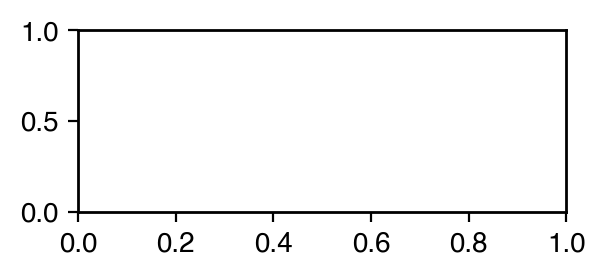

In [67]:
fig_pre_def()

fig = fig_pre_def(8,3) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 

interpoplation_axis= np.arange(0,20,0.001) # unit 0.0001 # times 10000

interpolation_func  = interp1d(rec_eff[:,0],rec_eff[:,1],fill_value="extrapolate") 
rec_eff_inter = interpolation_func(interpoplation_axis)

interpolation_func  = interp1d(scatter_eff[:,0],scatter_eff[:,1]/10000,fill_value="extrapolate") 
scatter_eff_inter = interpolation_func(interpoplation_axis)
plt.plot(interpoplation_axis,rec_eff_inter,'-',label = 'recording detection efficiency')
plt.plot(interpoplation_axis,scatter_eff_inter,'-',label = 'scatter detection efficiency')

fig_post_def(xlim=(0,12),ylim=(0,0.6),xlabel='neutron energy (MeV)',ylabel='efficiency')

# Neutron scatter: set time window and trigger PSD 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


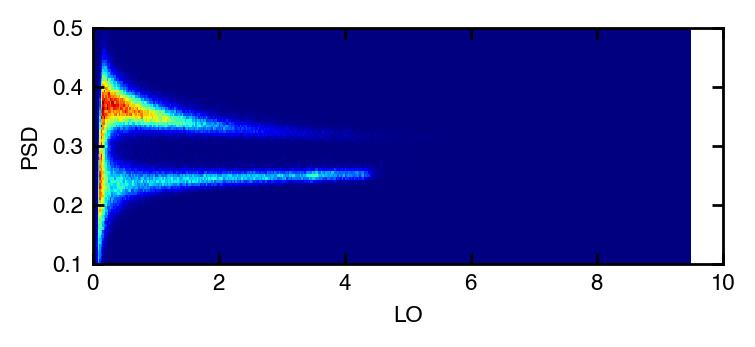

In [1040]:
fig = fig_pre_def(8,3)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.hist2d(proT_data_all['Tri_LO'],proT_data_all['Tri_PSD'], bins=(400, 100),cmin=0, cmap=plt.cm.jet)

fig_post_def(xlim =(0,10),ylim = (0.1,0.5),xlabel = 'LO',ylabel = 'PSD')


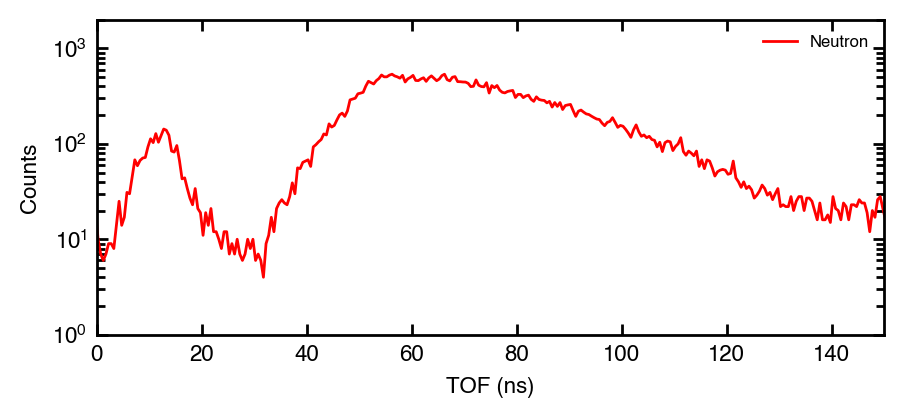

In [1041]:
fig = fig_pre_def(10,4)# 圖片大小
ax = fig.add_subplot(1, 1, 1) 

plt.plot(bin_center,hist_neutron,'r' ,linewidth=1,label ='Neutron')
fig_post_def(xlim =(0,150),ylim = (1,2000),xlabel = 'TOF (ns)',ylabel = 'Counts')
#plt.xlim(-20,200)
plt.ylim(1,)
plt.yscale('log')

In [1042]:
mask_TOF_upper  = proEE_data['TOF'] < 140
mask_TOF_lower  = proEE_data['TOF'] > 35
mask_Tri_n_PSD_upper  = proEE_data['Tri_PSD'] < 0.5
mask_Tri_n_PSD_lower  = proEE_data['Tri_PSD'] > 0.30
mask_TotalE_upper  = proEE_data['Total_E'] < 13
proEEW_data = proEE_data[(mask_TOF_upper 
                        & mask_TOF_lower 
                        & mask_TotalE_upper
                        & mask_Tri_n_PSD_lower
                        & mask_Tri_n_PSD_upper)]
print(proEEW_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.605467   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.357467   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.451467   
17     58.282  0.367484  1.286901      4.0  0.390533  0.29406   55.044467   
30     99.561  0.325301  0.256885      4.0  0.322684  0.18154   96.323467   

       Rec_E  Recoil_p_E   Total_E  
10  4.607789    1.880184  6.487973  
15  1.990149    1.233810  3.223958  
16  1.097267    0.859570  1.956838  
17  4.046347    1.306000  5.352347  
30  1.315550    0.934038  2.249588  


In [1081]:
proEEWeff_data = proEEW_data.copy()

proEEWeff_data["Rec_eff"]     = proEEW_data["Rec_E"].apply(lambda x:rec_eff_inter[int(x*1000)])
proEEWeff_data["scatter_eff"] = proEEW_data["Total_E"].apply(lambda x:scatter_eff_inter[int(x*1000)])
proEEWeff_data["angle"] = np.rad2deg(np.arctan((proEE_data["Recoil_p_E"]/proEE_data["Rec_E"])**0.5))
print(proEEWeff_data.head())

    time_diff   Rec_PSD    Rec_LO  Tri_Det   Tri_PSD   Tri_LO         TOF  \
10     54.843  0.378538  0.524912      4.0  0.340698  0.49880   51.605467   
15     81.595  0.342377  0.479106      4.0  0.426124  0.27086   78.357467   
16    108.689  0.407643  0.194366      4.0  0.352518  0.16124  105.451467   
17     58.282  0.367484  1.286901      4.0  0.390533  0.29406   55.044467   
30     99.561  0.325301  0.256885      4.0  0.322684  0.18154   96.323467   

       Rec_E  Recoil_p_E   Total_E   Rec_eff  scatter_eff      angle  
10  4.607789    1.880184  6.487973  0.457774     0.355106  32.569782  
15  1.990149    1.233810  3.223958  0.537141     0.507255  38.215990  
16  1.097267    0.859570  1.956838  0.419188     0.505844  41.511530  
17  4.046347    1.306000  5.352347  0.469947     0.385398  29.601771  
30  1.315550    0.934038  2.249588  0.501319     0.514843  40.117958  


In [1044]:
ISO_spectrum = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/ISO8529-2.txt')
Lorch_1973 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Lorch_1973.txt')
Scherzinger_2017 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2017.txt')
Scherzinger_2015 = np.loadtxt('../../../../data/AmBe_Neutron_spectrum/Scherzinger_2015.txt')

(0.05, 0.25)

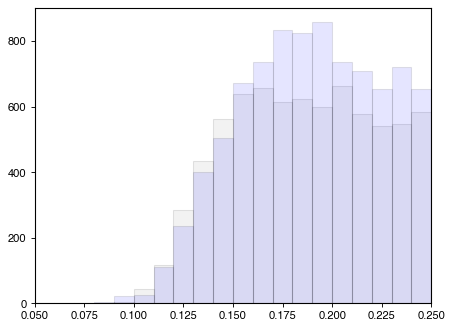

In [1045]:
y_tri = plt.hist(proEEWeff_data['Tri_LO'],1000,range=(0,10),color="gray",alpha=0.1,edgecolor = "k")
y_rec = plt.hist(proEEWeff_data['Rec_LO'],1000,range=(0,10),color="blue",alpha=0.1,edgecolor = "k")
plt.xlim(0.05,0.25)

In [1127]:
mask_rec_threshold = proEEWeff_data["Rec_LO"]>0.3
mask_tri_threshold = proEEWeff_data["Tri_LO"]>0.1
#mask_angle_lower = proEEWeff_data["angle"]>25
#mask_angle_upper = proEEWeff_data["angle"]<35
proEEWeffTh_data = proEEWeff_data[(mask_rec_threshold
                                    & mask_tri_threshold
                                    #& mask_angle_lower
                                    #& mask_angle_upper
                                    )]

In [1128]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

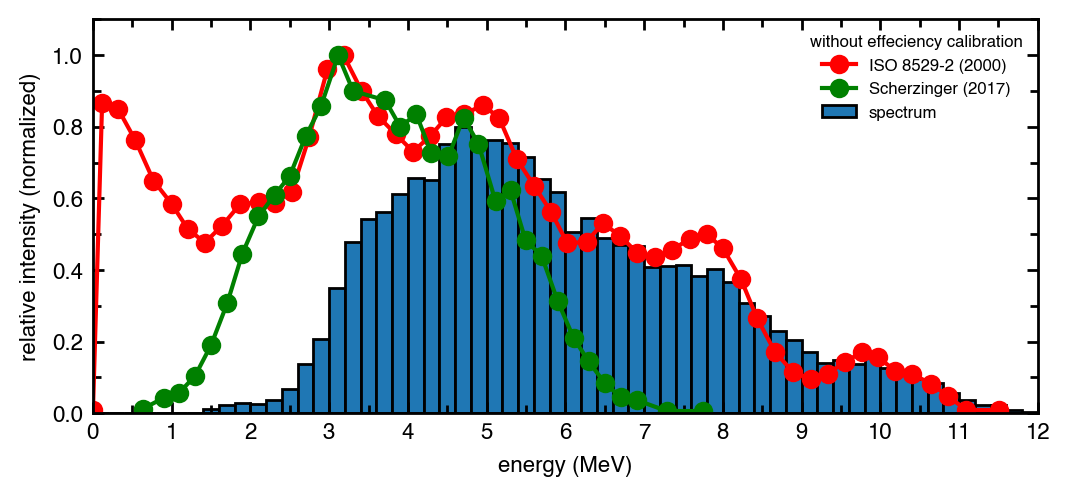

In [1129]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, 0.8*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [1130]:
output_N_scatter = Neutron_E_axis[:,np.newaxis]
output_N_scatter = np.column_stack((output_N_scatter,Neutron_E_y[:,np.newaxis]))
np.savetxt("N_scatter_20221113.txt",output_N_scatter)

In [1122]:
mask_rec_threshold2 = proEEWeff_data["Rec_LO"]>0.3
mask_tri_threshold2 = proEEWeff_data["Tri_LO"]>0.1
mask_angle_lower = proEEWeff_data["angle"]>10
mask_angle_upper = proEEWeff_data["angle"]<60
proEEWeffTh_data2 = proEEWeff_data[(mask_rec_threshold2
                                    & mask_tri_threshold2
                                    & mask_angle_lower
                                    & mask_angle_upper)]
#proEEWeffTh2_data = proEEWeff_data[(mask_rec_threshold2&mask_tri_threshold2)]

In [1123]:
Neutron_energy_lower = 0 # 0 MeV
Neutron_energy_upper = 12 # 10 MeV
Binning = 60 # cut to 100 pieces
Neutron_E_axis, Neutron_E_y = sorting(
    proEEWeffTh_data2['Total_E'], Binning , Neutron_energy_lower, Neutron_energy_upper)

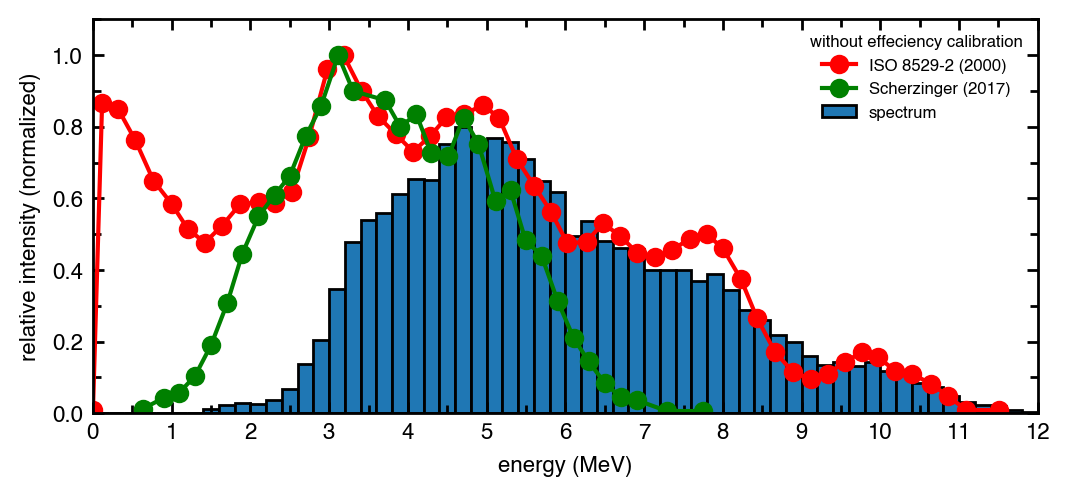

In [1124]:

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(Neutron_E_axis, 0.8*Neutron_E_y/Neutron_E_y.max(),width=0.2,edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[:,1].max(),'o-r',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[:,1].max(),'o-g',label='Scherzinger (2017)')
#plt.plot(Scherzinger_2015[:,0],Scherzinger_2015[:,1]/Scherzinger_2015[:,1].max(),'o-',label='Scherzinger (2015)')
#plt.plot(Lorch_1973[:,0],Lorch_1973[:,1]/Lorch_1973[:,1].max(),'o-',label='Lorch (1973)')


ax.set_xlabel("Energy (MeV)",fontsize=18)
ax.set_ylabel("Counts",fontsize=18)
fig_post_def(xlim=(0,12),ylim=(0,1.1),xticks=(1,0.5),yticks=(0.2,0.1),xlabel='energy (MeV)',ylabel='relative intensity (normalized)'
            ,title='without effeciency calibration')
#plt.legend(fontsize=18)




In [1125]:
bin_width=0.2
spectrum_x_s = np.arange(0,20,bin_width)
spectrum_hist_s = np.zeros(len(spectrum_x_s))
for i in np.arange(0,len(proEEWeffTh2_data['Total_E']),1):
    if ((proEEWeffTh2_data.iloc[[i],[11]].values > 0)):
        spectrum_hist_s[int(np.round((proEEWeffTh2_data.iloc[[i],[9]].values*(bin_width**-1)),0))] += (proEEWeffTh2_data.iloc[[i],[11]].values)**-1


Text(0, 0.5, 'Counts')

<Figure size 629.921x472.441 with 0 Axes>

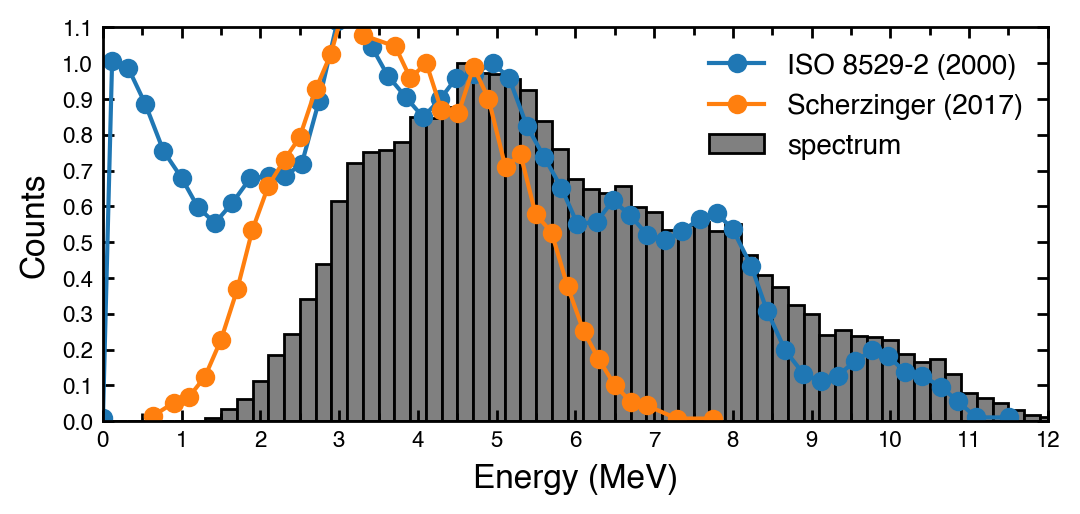

In [1126]:

fig_pre_def()

fig = fig_pre_def(12,5) # 定義圖片大小 default 8*6
ax =fig.add_subplot(1, 1, 1) 


ax.bar(0+spectrum_x_s, 1*spectrum_hist_s/spectrum_hist_s.max(),width=bin_width,color="gray",edgecolor = "k",label= 'spectrum')
plt.plot(ISO_spectrum[:,0],ISO_spectrum[:,1]/ISO_spectrum[20:,1].max(),'o-',label='ISO 8529-2 (2000)')
plt.plot(Scherzinger_2017[:,0],Scherzinger_2017[:,1]/Scherzinger_2017[15:,1].max(),'o-',label='Scherzinger (2017)')

fig_post_def(xlim=(0,12),ylim=(0,1.1),lg_fs=10,xticks=(1,0.5),yticks=(0.1,0.5),xlabel='energy (MeV)',ylabel='relative intensity (normalized)')
#plt.legend(fontsize=18)
ax.set_xlabel("Energy (MeV)",fontsize=12)
ax.set_ylabel("Counts",fontsize=12)

